In [1]:
import zipfile
import os


In [2]:
zip_path = "netflix_titles.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

os.listdir()


['.ipynb_checkpoints',
 'netflix_analysis.ipynb',
 'netflix_titles.csv',
 'netflix_titles.csv.zip']

In [3]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape


(8807, 12)

In [5]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'] = df['director'].fillna('Not Specified')
df['cast'] = df['cast'].fillna('Not Specified')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')



In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [10]:
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [11]:
df['year_added'] = df['date_added'].dt.year


In [12]:
df[['date_added', 'year_added']].head()


,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


In [13]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt


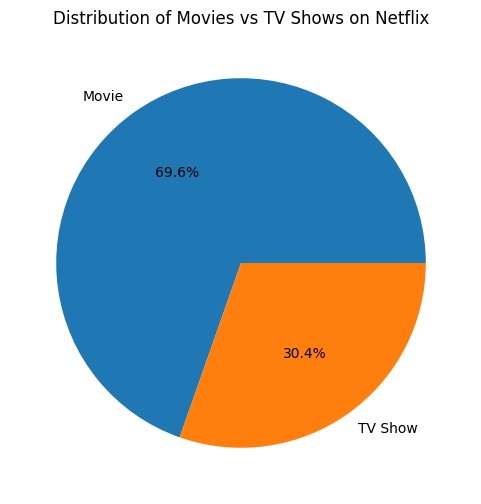

In [16]:
df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='Distribution of Movies vs TV Shows on Netflix'
)
plt.ylabel('')
plt.show()


In [17]:
df['release_year'].value_counts().sort_index().head()


release_year
1925    1
1942    2
1943    3
1944    3
1945    4
Name: count, dtype: int64

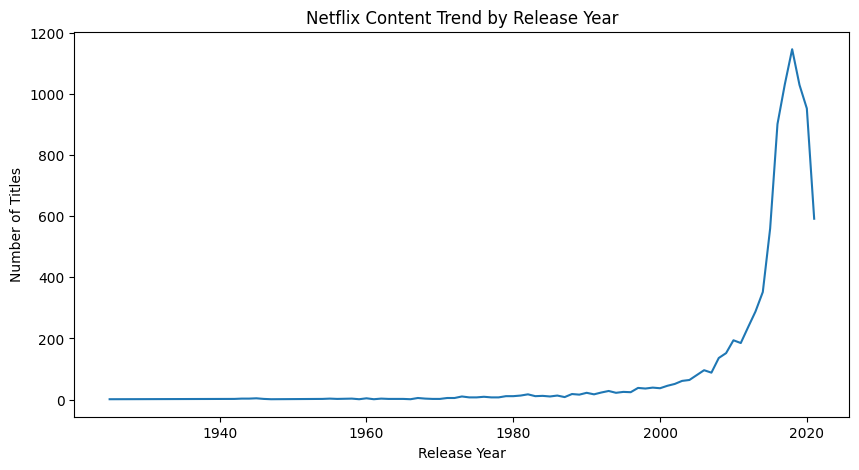

In [18]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Netflix Content Trend by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


In [19]:
genres = df['listed_in'].str.split(', ').explode()
genres.head()


0             Documentaries
1    International TV Shows
1                 TV Dramas
1              TV Mysteries
2            Crime TV Shows
Name: listed_in, dtype: object

In [20]:
genres.value_counts().head(10)


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

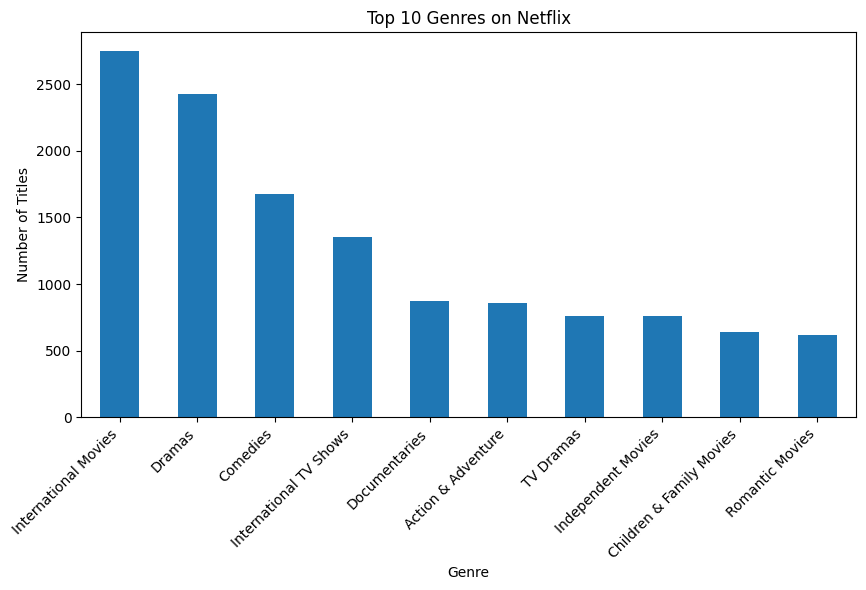

In [21]:
genres.value_counts().head(10).plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 Genres on Netflix'
)
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
countries = df['country'].str.split(', ').explode()
countries.head()


0    United States
1     South Africa
2          Unknown
3          Unknown
4            India
Name: country, dtype: object

In [23]:
countries.value_counts().head(10)


country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64

In [24]:
country_counts = countries.value_counts()
country_counts = country_counts.drop('Unknown')
country_counts.head(10)


country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

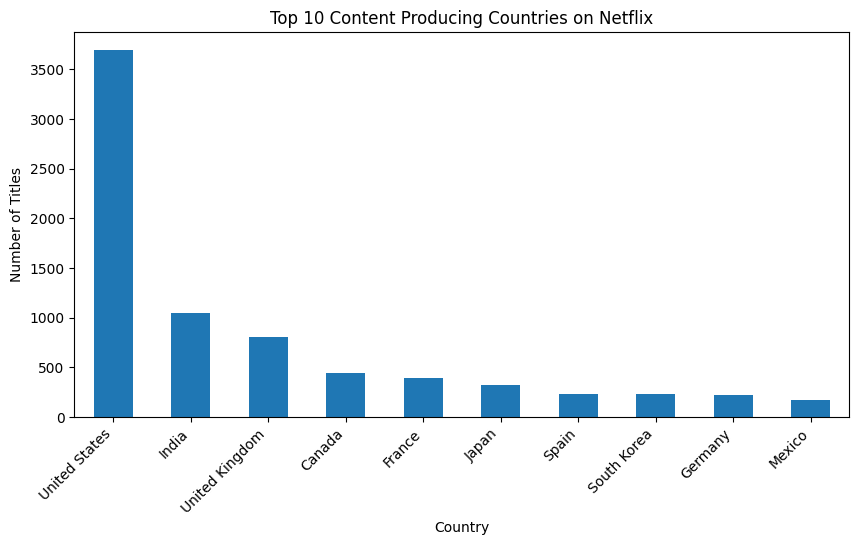

In [25]:
country_counts.head(10).plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 Content Producing Countries on Netflix'
)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


In [27]:
df_heatmap = df[['release_year', 'listed_in']].copy()



In [28]:
df_heatmap['genre'] = df_heatmap['listed_in'].str.split(', ')
df_heatmap = df_heatmap.explode('genre')


In [29]:
pivot_table = pd.pivot_table(
    df_heatmap,
    index='genre',
    columns='release_year',
    aggfunc='size',
    fill_value=0
)


In [30]:
top_genres = genres.value_counts().head(10).index
pivot_table = pivot_table.loc[top_genres]


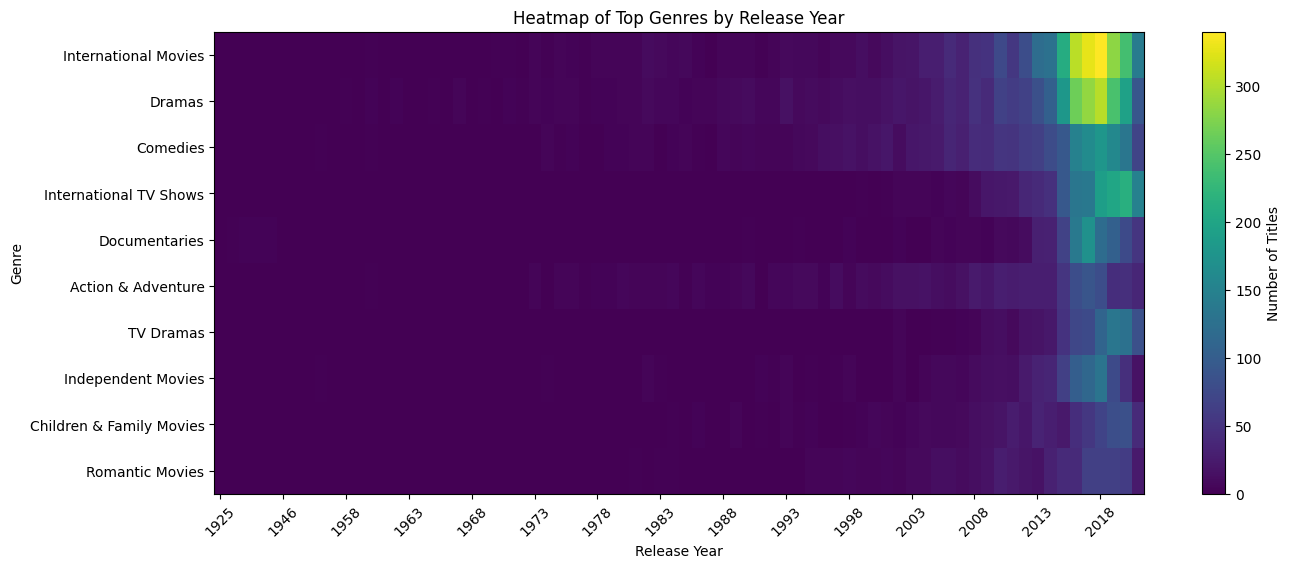

In [31]:
plt.figure(figsize=(15,6))
plt.imshow(pivot_table, aspect='auto')
plt.colorbar(label='Number of Titles')
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xticks(
    range(0, len(pivot_table.columns), 5),
    pivot_table.columns[::5],
    rotation=45
)
plt.title('Heatmap of Top Genres by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.show()
